PROYECTO INDIVIDUAL N°1

In [1]:
import ast 
import pandas as pd
from typing import Dict

In [2]:
rows = []
with open ('steam_games.json', encoding = 'utf-8') as f: # f contains the data of the archive
    for line in f.readlines():
        rows.append(ast.literal_eval(line))

df1 = pd.DataFrame(rows)
df1['release_date'] = pd.to_datetime(df1['release_date'], format='%Y-%m-%d', errors='coerce')
dff = df1.dropna(subset= ['release_date'])
dff['release_date'] = pd.to_datetime(dff['release_date'])

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


In [3]:
df_anid = dff.explode('genres')

In [4]:
def genero(year: int):
    df = df_anid[['release_date','genres']]
    years = pd.to_datetime(year,format = '%Y').to_period('Y')
    df_filter = df[df['release_date'].dt.to_period('Y') == years]
    df_top = df_filter['genres'].value_counts()
    top_genres = df_top.head(5)
    return {year: top_genres.to_dict()}

In [5]:
genero(2019)

{2019: {'Action': 2, 'Adventure': 2, 'Indie': 2, 'RPG': 2, 'Strategy': 1}}

In [6]:
def juegos(year: int):
    df = dff[['release_date','app_name']]
#Convert the time to datetime object.Then it converts the datetime object to period object with a yearly frequency
    years = pd.to_datetime(year,format = '%Y').to_period('Y')
#Filter the selectiong the rows only when the period is equal to the year stored in the variable
    df_filter = df[df['release_date'].dt.to_period('Y') == years]
#Converted the column into a list and contain it in the variable
    juegos_lanzados = df_filter['app_name'].astype(str).tolist()
    juegos_dict = {juego for juego in juegos_lanzados}
    return {year: juegos_dict}

In [7]:
print(juegos(2014))

{2014: {'Rocksmith® 2014 – A Day To Remember - “If It Means a Lot to You”', 'Acceleration of SUGURI X-Edition HD', 'Star Swarm Stress Test', 'XenoRaptor', 'Cherry Tree High I! My! Girls!', 'Train Simulator: Union Pacific GP50 Loco Add-On', 'Rocksmith® 2014 – Bob Dylan - “Just Like a Woman”', "Don't Know Yet", 'Backgammon', 'Call of Duty®: Ghosts - Fitness Pack', 'Ninja Cats vs Samurai Dogs', 'Hive - The Ladybug', 'Fable Anniversary - Scythe Content Pack', 'Voices from the Sea - Plus', 'My Lands: Golden Age - Premium DLC Pack', 'A Story About My Uncle', 'Rocksmith® 2014 – Audioslave - “Show Me How to Live”', 'Boundless', 'Oniken: Unstoppable Edition', 'Star Traders: 4X Empires', 'Grim Legends 2: Song of the Dark Swan', 'Episode 18 - Jack and the Beanstalk', 'Loves Her Gun', 'South Park™: The Stick of Truth™ - Super Samurai Spaceman Pack', 'Metro: Last Light Redux', 'Space Run', 'FarSky', 'Battle of Empires : 1914-1918 - Editor', 'Call of Duty®: Black Ops II - Dragon Personalization Pack

In [8]:
def specs(year: int):
    df = dff[['release_date','specs']]
    years = pd.to_datetime(year,format = '%Y').to_period('Y')
    df_filter = df[df['release_date'].dt.to_period('Y') == years]
    df_filter = df_filter.explode('specs')
    df_top = df_filter['specs'].value_counts()
    top_specs = df_top.head(5)
    return {year: top_specs.to_dict()}

In [9]:
specs(2014)

{2014: {'Single-player': 2481,
  'Steam Achievements': 1722,
  'Steam Trading Cards': 1384,
  'Downloadable Content': 1338,
  'Steam Cloud': 1217}}

In [83]:
def earlyaccess(year: int):
    df = dff[['release_date','early_access']]
    years = pd.to_datetime(year,format = '%Y').to_period('Y')
    df_filter = df[(df['release_date'].dt.to_period('Y') == years) & (df['early_access'] == True)]    
    num_early_access = len(df_filter) #Count the number of rows with True
    return {year: num_early_access}

In [85]:
earlyaccess(2000)

{2000: 0}

In [12]:
def sentiment( year : int):
    dfs = dff[['sentiment','release_date']]
    #Use isin to created a boolean series that indicate the value of the column
    #The ~ operator is used to invert the boolean series. 
    mask = ~dfs['sentiment'].isin(['Overwhelmingly Positive','Mostly Positive','Very Positive','Positive', 'Mixed', 'Negative','Mostly Negative','Very Negative','Overwhelmingly Negative'])
    #Select the rows where the mask is True and set that values in the column for None
    dfs.loc[mask, 'sentiment'] = 'None'
    years = pd.to_datetime(year,format = '%Y').to_period('Y')
    df_filter = dfs[dfs['release_date'].dt.to_period('Y') == years]    
    critics = df_filter['sentiment']
    num_critics = critics.value_counts() #Count the values True and False of the column
    return {year: num_critics.to_dict()}
    

In [13]:
sentiment(2014)

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


{2014: {'None': 1196,
  'Mixed': 467,
  'Very Positive': 429,
  'Mostly Positive': 333,
  'Positive': 236,
  'Mostly Negative': 99,
  'Overwhelmingly Positive': 37,
  'Negative': 27,
  'Very Negative': 7,
  'Overwhelmingly Negative': 1}}

In [91]:
def metascore(year: int):
    df = dff[['release_date','metascore','app_name']]
    years = pd.to_datetime(year,format = '%Y').to_period('Y')
    df_filter = df[df['release_date'].dt.to_period('Y') == years] 
    
    # Fill NaN values in the metascore column with the mean of the column
    df_filter['metascore'].fillna(df_filter['metascore'].mean(), inplace=True)
    
    # Sort rows by metascore in descending order
    df_sorted = df_filter.sort_values(by='metascore', ascending=False)
    
    # Get the names and metascores of the top 5 games
    top_games = df_sorted[['app_name', 'metascore']].head(5)
    
    # Convert the result to a dictionary
    result = top_games.set_index('app_name')['metascore'].to_dict()
    return {year: result}

In [92]:
metascore(2018)

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


{2018: {'Lost Summoner Kitty': nan,
  'Ironbound': nan,
  'Battle Royale Trainer': nan,
  'SNOW - All Access Basic Pass': nan,
  'SNOW - All Access Pro Pass': nan}}

ANALISIS EXPLORATORIO DE DATOS

Primero vamos a limpiar los datos con el fin de trabajar el modelo con datos limpios

In [17]:
# import the libraries
import numpy as np
import pandas as pd
import ast

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [18]:
rows = []
with open ('steam_games.json', encoding = 'utf-8') as f: # f contains the data of the archive
    for line in f.readlines():
        rows.append(ast.literal_eval(line))

df1 = pd.DataFrame(rows)
df1['release_date'] = pd.to_datetime(df1['release_date'], format='%Y-%m-%d', errors='coerce')
dff = df1.dropna(subset= ['release_date'])
dff['release_date'] = pd.to_datetime(dff['release_date'])

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


In [19]:
#Make a copy of the original DT to prevent a advice and work easily
dfc1 = dff.copy()

In [20]:
#Create a new column only with the year 
dfc1['year'] = dfc1['release_date'].dt.year

In [21]:
#Select the columns to work
dfc1 = dfc1[['genres','year','price','early_access','sentiment']]

In [22]:
#Replace de # user reviews using r'\d+ user reviews', r to indicate a raw str, \d+ to matches 0-9 digits and more than one digit
dfc1['sentiment'] = dff['sentiment'].replace(to_replace=r'\d+ user reviews', value=0, regex=True)

In [23]:
#Drop the NaN values in the dataframe
dfc1.dropna(inplace = True)

In [24]:
dfc1.sort_values(['year'], inplace = True)

In [25]:
dfc1.reset_index(inplace = True, drop  = True)
dfc1.tail()

,genres,year,price,early_access,sentiment
21770,"[Action, Adventure, Casual, Indie, Simulation,...",2018,29.99,True,Mixed
21771,"[Design &amp; Illustration, Education, Utilities]",2018,14.99,False,0
21772,"[Free to Play, Indie, RPG, Strategy]",2018,Free To Play,False,Mostly Positive
21773,"[Action, Adventure, Indie, RPG, Strategy, Earl...",2019,14.99,True,0
21774,"[Adventure, Indie, RPG]",2021,4.99,False,Positive


In [26]:
#Replace the distic values that aren't numeric
dfc1['price'] = pd.to_numeric(dfc1['price'], errors='coerce')

In [27]:
dfc1['price'] = dfc1['price'].fillna(0)

In [28]:
dfc1.tail(5)

,genres,year,price,early_access,sentiment
21770,"[Action, Adventure, Casual, Indie, Simulation,...",2018,29.99,True,Mixed
21771,"[Design &amp; Illustration, Education, Utilities]",2018,14.99,False,0
21772,"[Free to Play, Indie, RPG, Strategy]",2018,0.00,False,Mostly Positive
21773,"[Action, Adventure, Indie, RPG, Strategy, Earl...",2019,14.99,True,0
21774,"[Adventure, Indie, RPG]",2021,4.99,False,Positive


In [29]:
#Transform bool to binary
dfc1['early_access'] = dfc1['early_access'].astype(int)

In [30]:
dfc1

,genres,year,price,early_access,sentiment
0,"[Action, Adventure, Casual]",1983,9.99,0,Very Positive
1,"[Action, Adventure, Casual]",1984,9.99,0,Very Positive
2,"[Casual, Indie]",1984,1.99,0,Positive
3,[Simulation],1985,6.99,0,0
4,"[Adventure, Casual, Indie, RPG, Simulation]",1986,7.99,0,Mixed
...,...,...,...,...,...
21770,"[Action, Adventure, Casual, Indie, Simulation,...",2018,29.99,1,Mixed
21771,"[Design &amp; Illustration, Education, Utilities]",2018,14.99,0,0
21772,"[Free to Play, Indie, RPG, Strategy]",2018,0.00,0,Mostly Positive
21773,"[Action, Adventure, Indie, RPG, Strategy, Earl...",2019,14.99,1,0


In [31]:
dfc1.dtypes

genres           object
year              int64
price           float64
early_access      int32
sentiment        object
dtype: object

In [32]:
dfc2 = dfc1.copy()

In [33]:
dfc2.head(10)

,genres,year,price,early_access,sentiment
0,"[Action, Adventure, Casual]",1983,9.99,0,Very Positive
1,"[Action, Adventure, Casual]",1984,9.99,0,Very Positive
2,"[Casual, Indie]",1984,1.99,0,Positive
3,[Simulation],1985,6.99,0,0
4,"[Adventure, Casual, Indie, RPG, Simulation]",1986,7.99,0,Mixed
5,[Simulation],1987,6.99,0,0
6,"[Adventure, Simulation]",1987,6.99,0,Mixed
7,[Adventure],1987,5.99,0,Mixed
8,[Adventure],1987,9.99,0,Mostly Positive
9,"[Adventure, Indie, RPG, Strategy]",1988,5.99,0,Very Positive


In [34]:
#Make a dict varible in order to change the sentiment to number
mapping = {'Overwhelmingly Positive':9,'Very Positive': 8,'Mostly Positive':7, 'Positive': 6, 'Mixed': 5,'Mostly Negative':4,'Negative': 3, 'Very Negative': 2,'Overwhelmingly Negative':1}
dfc2['sentiment'] = dfc2['sentiment'].replace(mapping)

In [35]:
dfc2

,genres,year,price,early_access,sentiment
0,"[Action, Adventure, Casual]",1983,9.99,0,8
1,"[Action, Adventure, Casual]",1984,9.99,0,8
2,"[Casual, Indie]",1984,1.99,0,6
3,[Simulation],1985,6.99,0,0
4,"[Adventure, Casual, Indie, RPG, Simulation]",1986,7.99,0,5
...,...,...,...,...,...
21770,"[Action, Adventure, Casual, Indie, Simulation,...",2018,29.99,1,5
21771,"[Design &amp; Illustration, Education, Utilities]",2018,14.99,0,0
21772,"[Free to Play, Indie, RPG, Strategy]",2018,0.00,0,7
21773,"[Action, Adventure, Indie, RPG, Strategy, Earl...",2019,14.99,1,0


In [36]:
dfc2.dtypes

genres           object
year              int64
price           float64
early_access      int32
sentiment         int64
dtype: object

In [37]:
dfc2['price'].describe()

count    21775.000000
mean         9.341319
std         14.127213
min          0.000000
25%          2.990000
50%          4.990000
75%          9.990000
max        771.710000
Name: price, dtype: float64

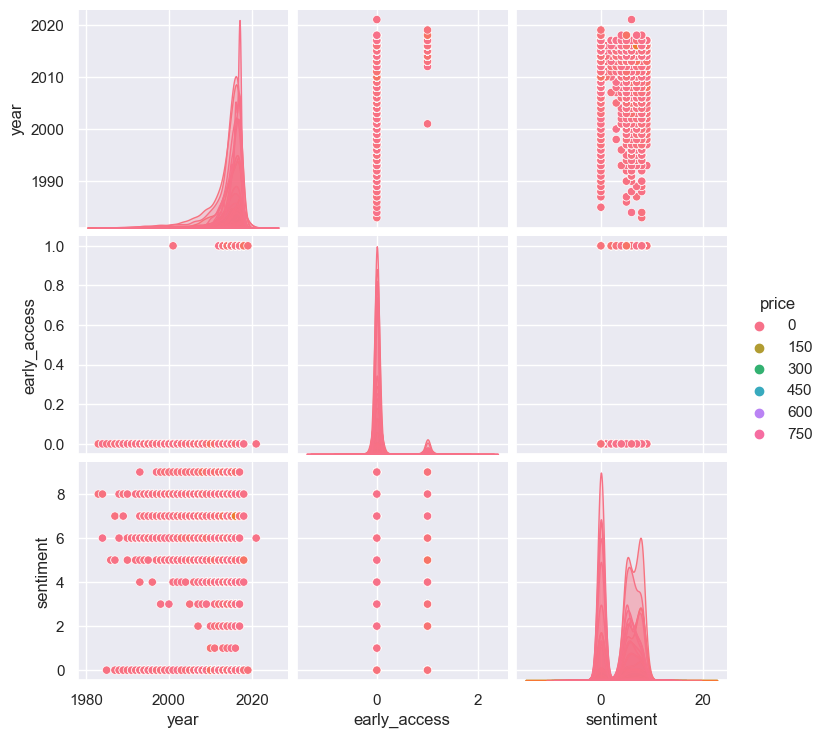

In [38]:
sns.pairplot(dfc2, hue = 'price',palette='husl')
plt.show()

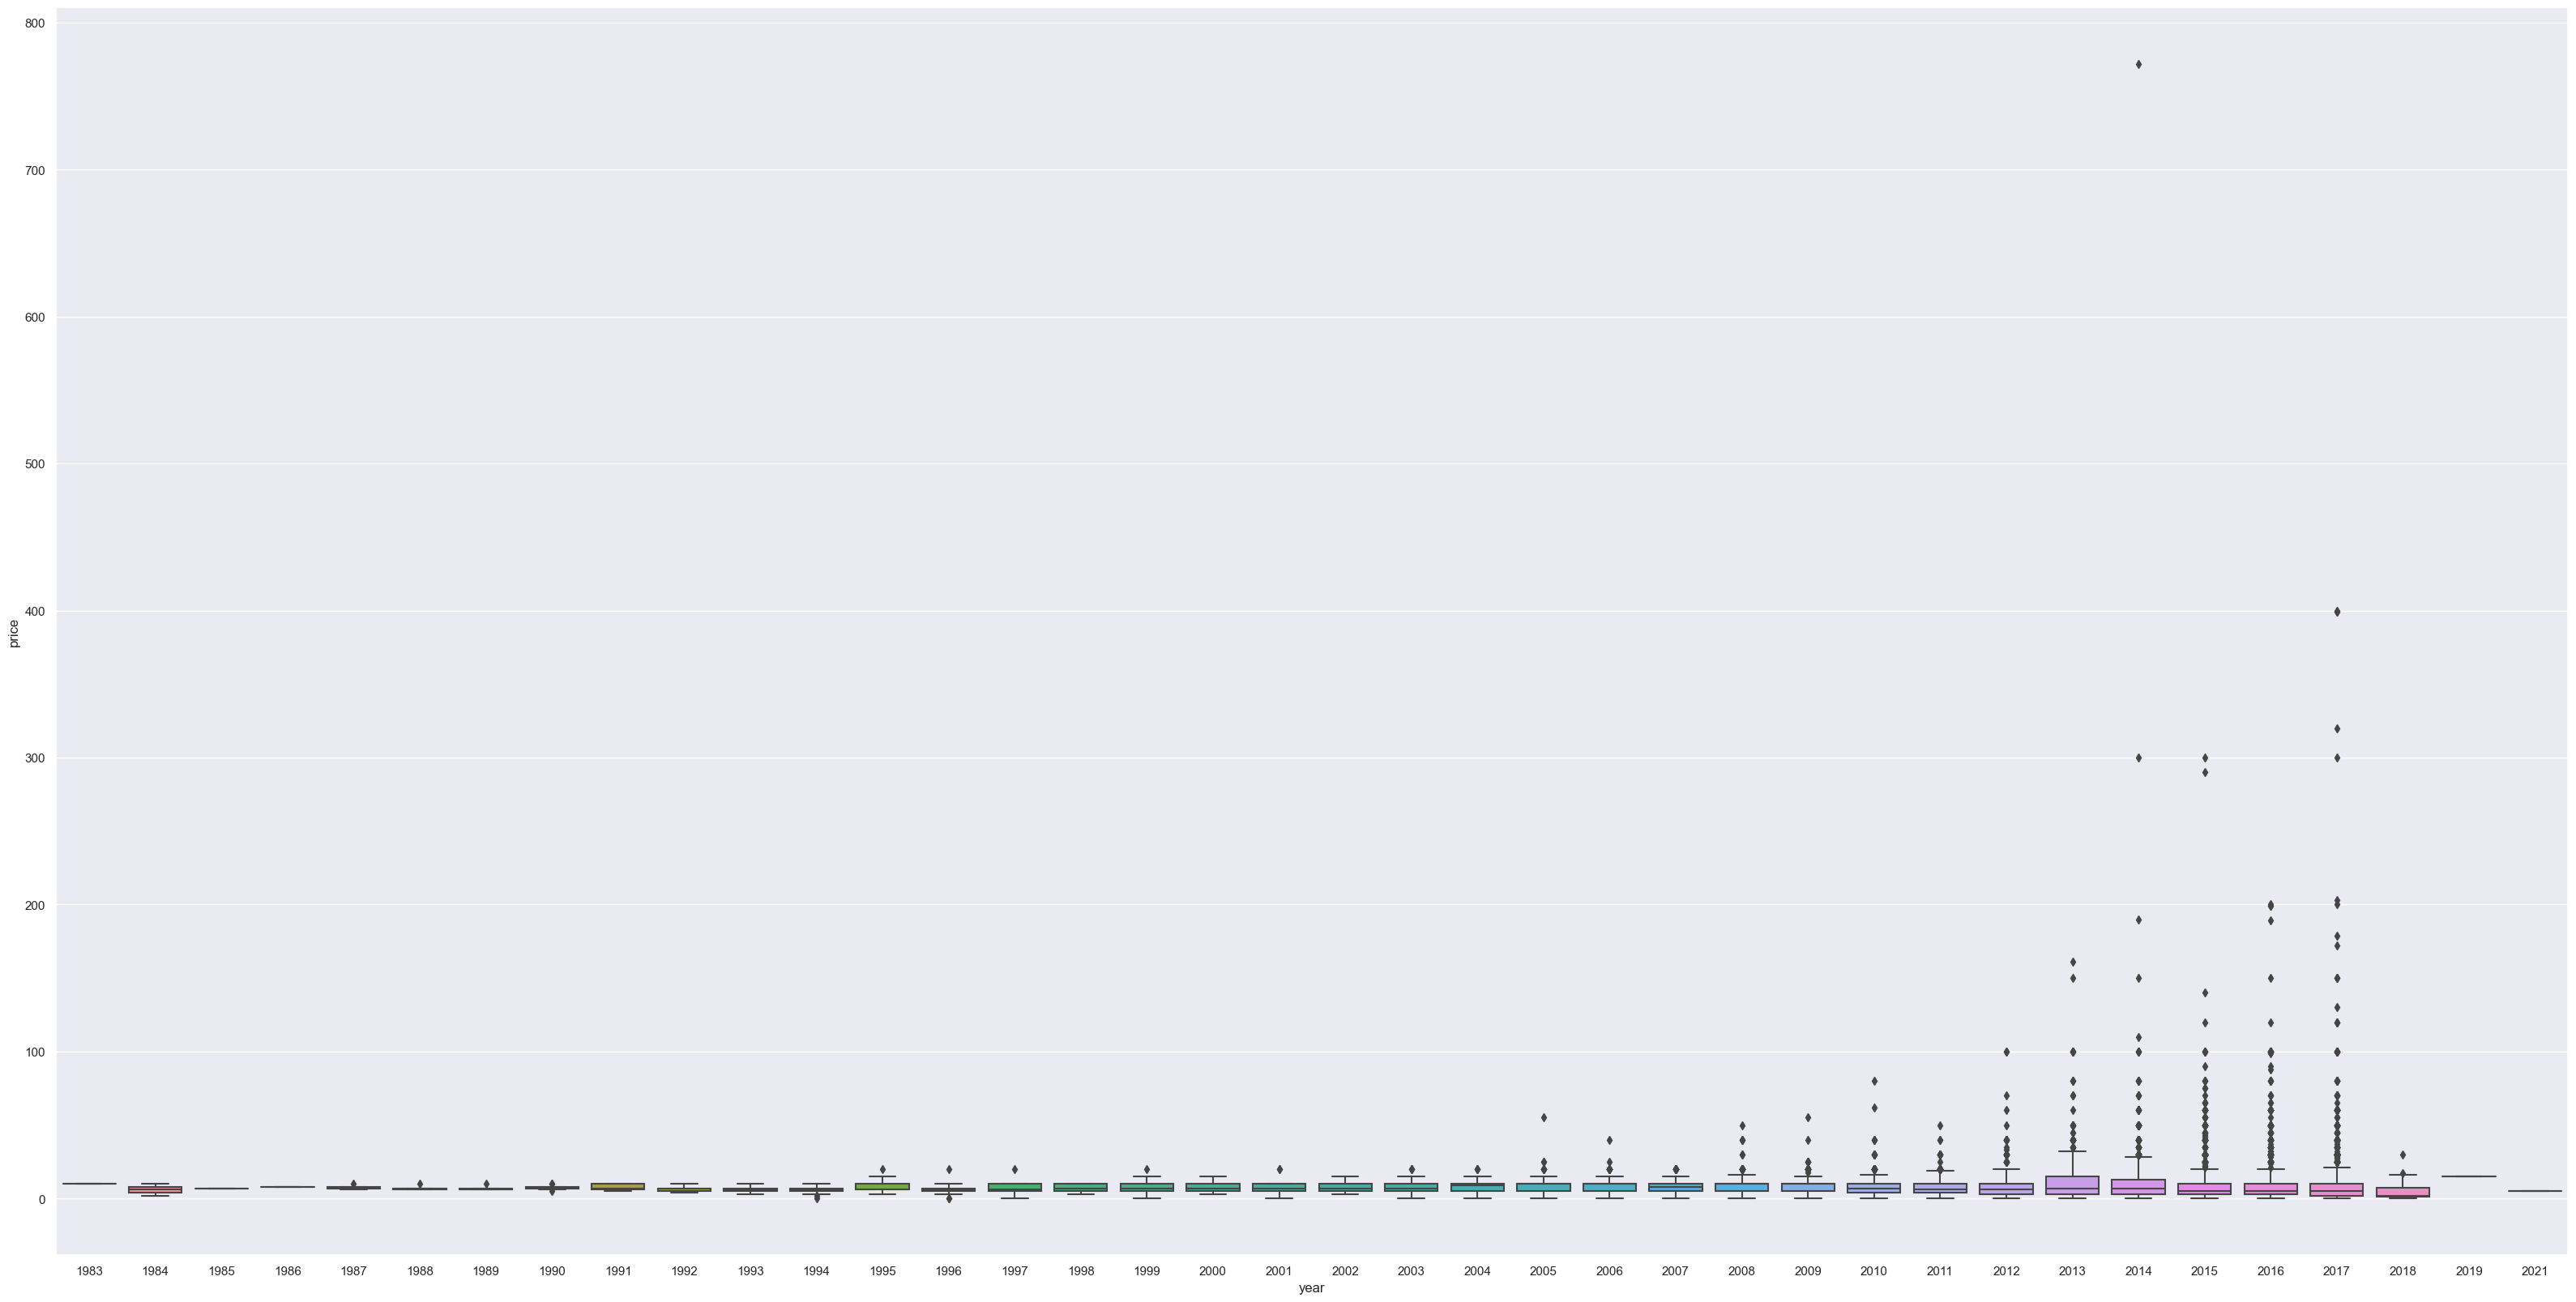

In [39]:
# Do a boxplot to determine the outliers
plt.figure(figsize=(40, 20))
sns.boxplot(x='year', y='price', data=dfc2)
plt.show()


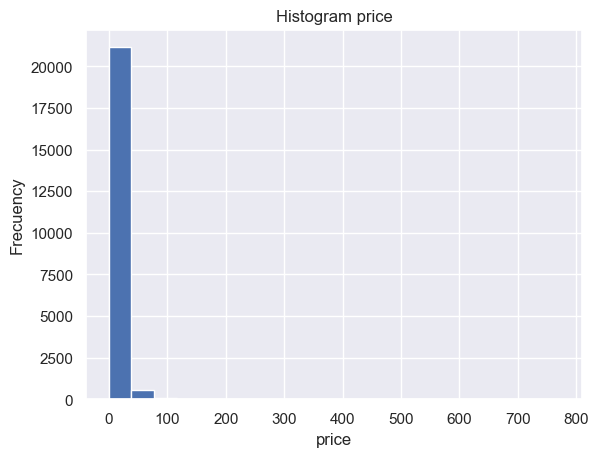

In [40]:
#Make a histogram of the prices
plt.hist(dfc2['price'], bins=20)
plt.xlabel('price')
plt.ylabel('Frecuency')
plt.title('Histogram price')
plt.show()

In [41]:
#Clean the outliers in price because the graphic show a lot of it and will change the prediction
dfc2 = dfc2.loc[dfc2['price'] <= 60]

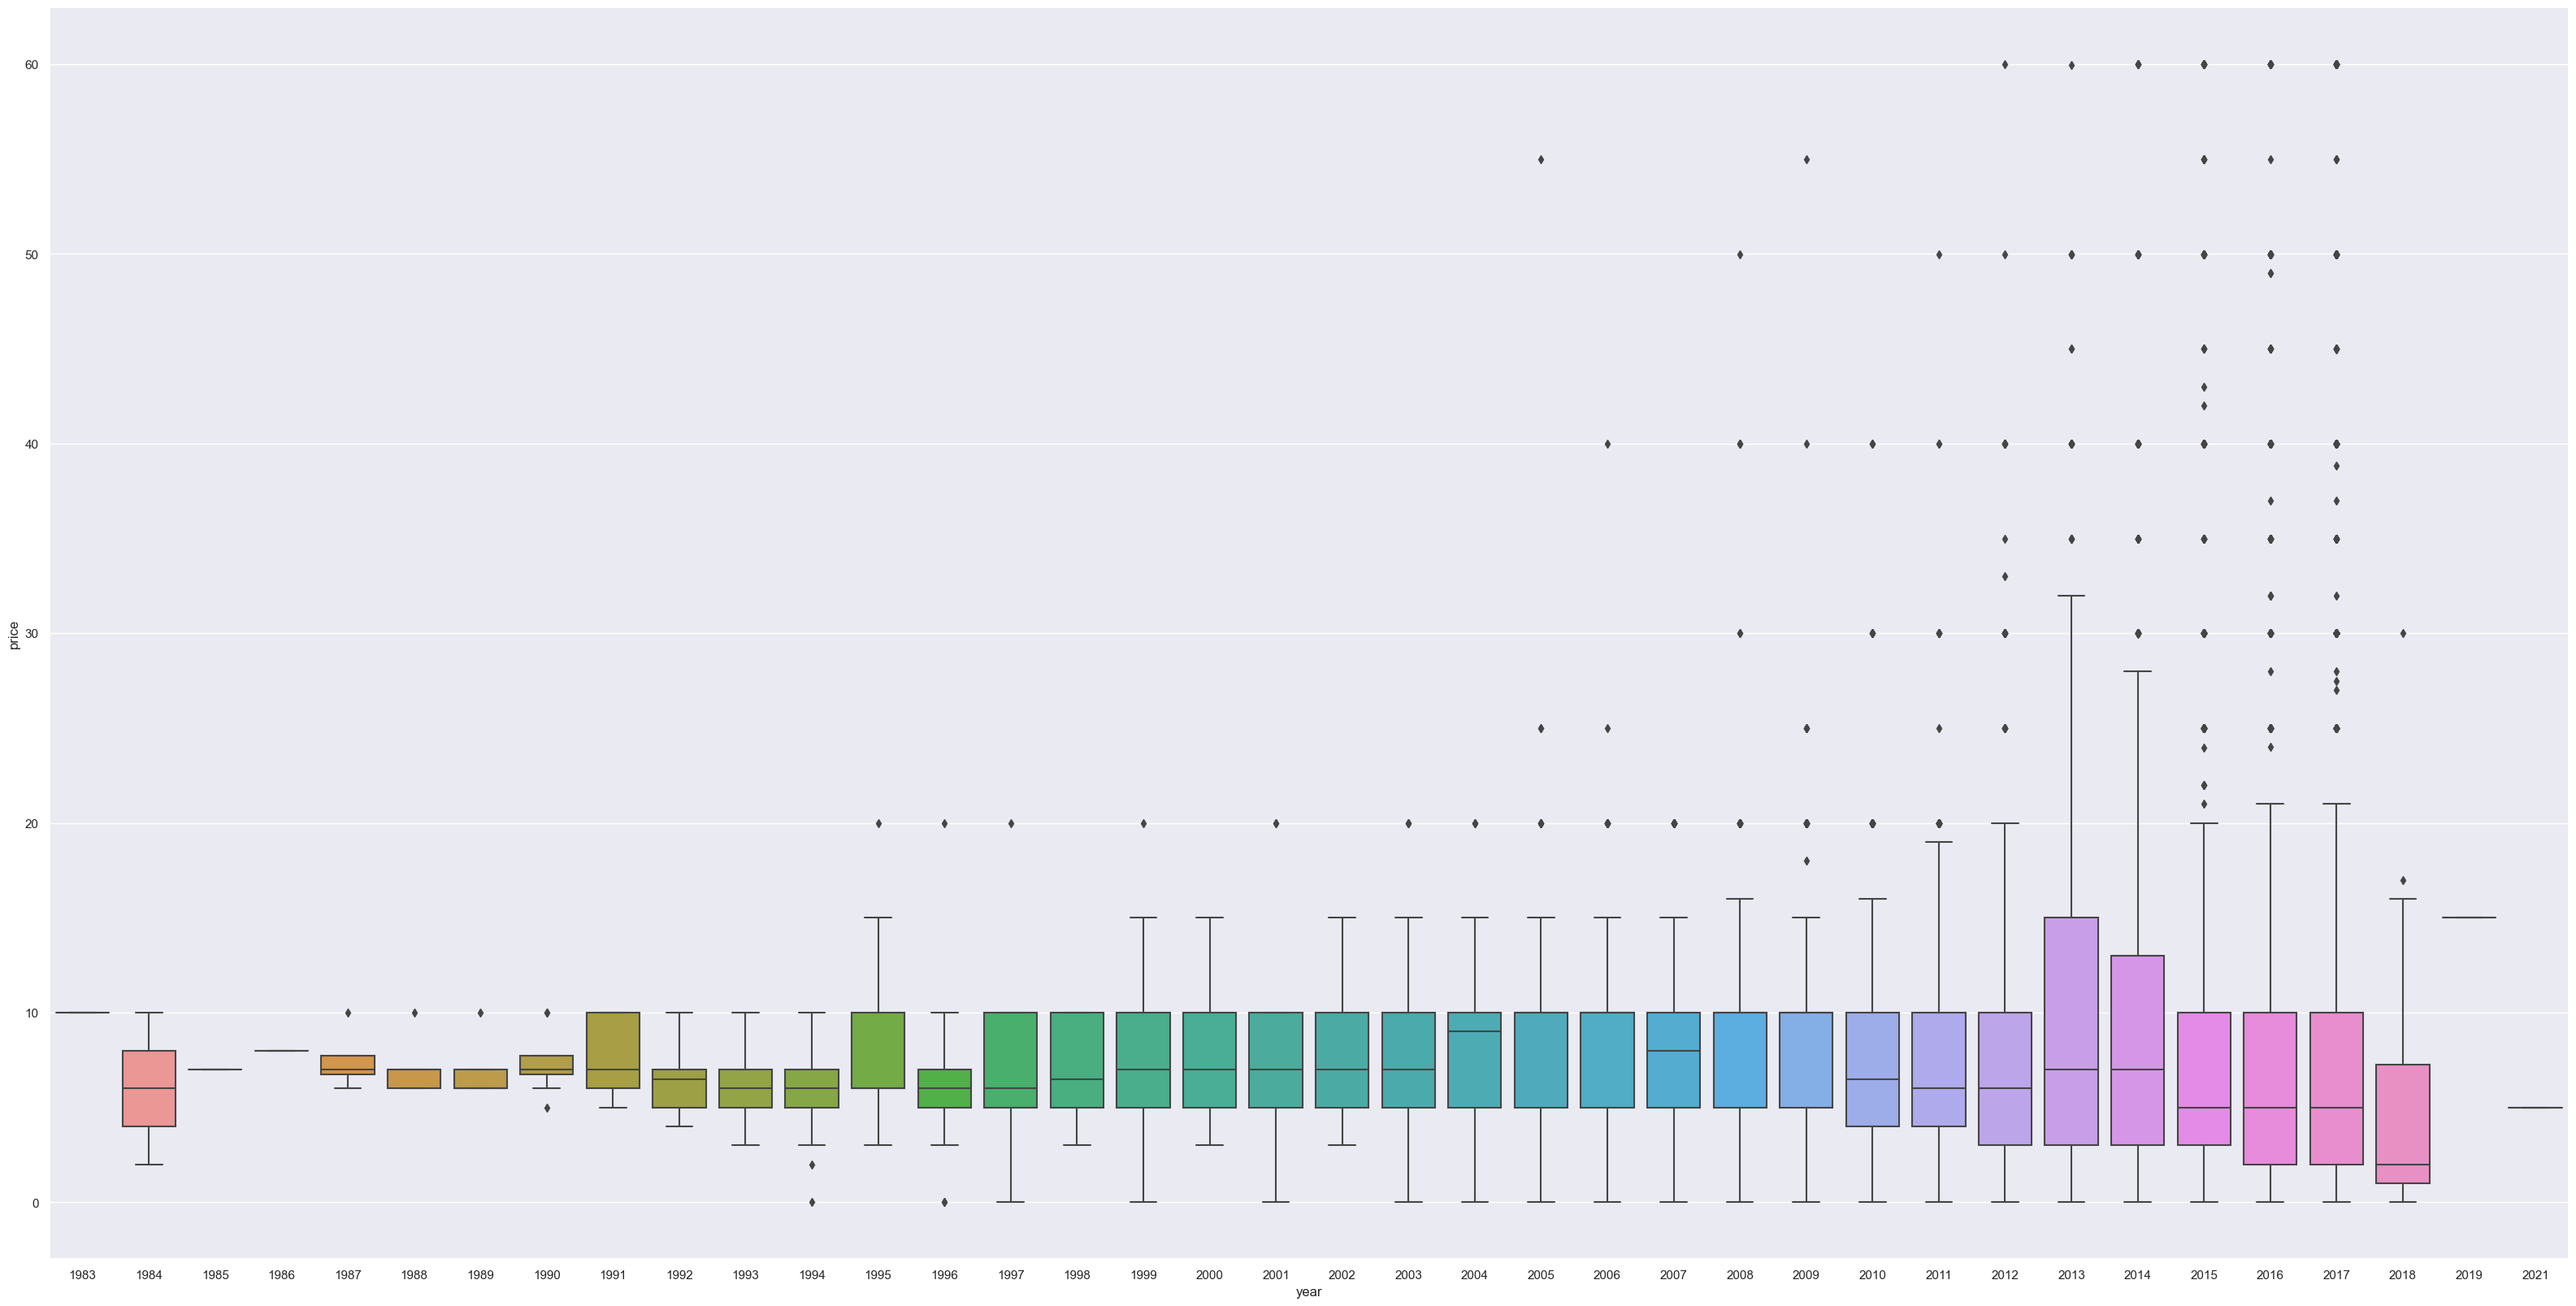

In [42]:
plt.figure(figsize=(40, 20))
sns.boxplot(x='year', y='price', data=dfc2)
plt.show()

In [43]:
#Unnest the colum genres in df_anid to continue
df_anid = dfc2.explode('genres')

In [44]:
#To plot the df choose a specific period of time and a genre to see the dates 
x = df_anid[(df_anid['genres']=='Action' )]['year']
y = df_anid[(df_anid['genres']=='Action' )]['price']

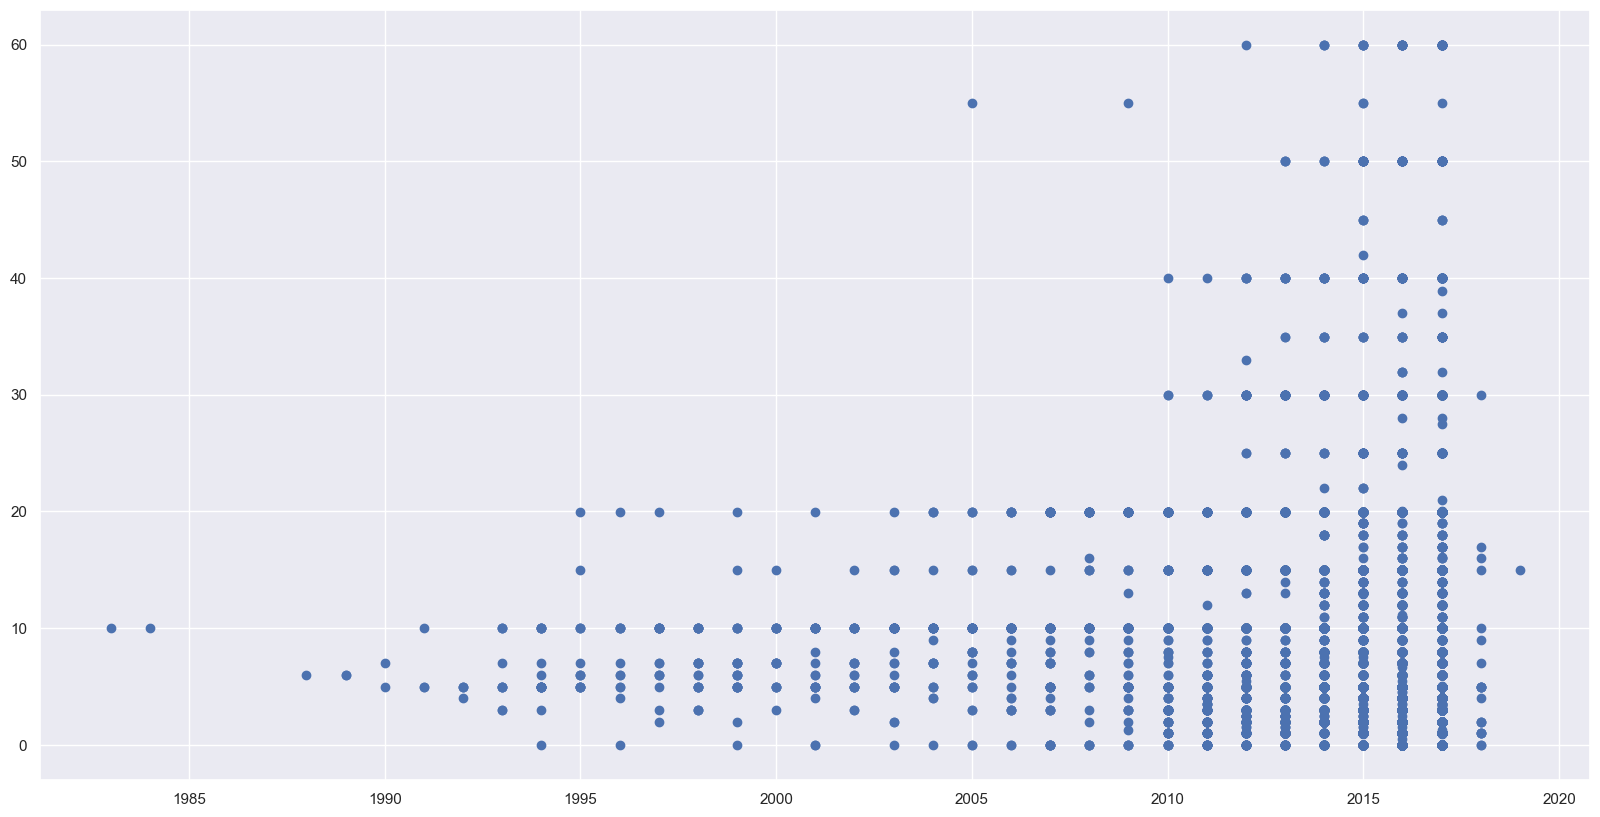

In [45]:
# Plot
plt.figure(figsize=(20, 10))
plt.scatter(x, y)
plt.show()

In [46]:
#filter for a period of time with more data 
df_filtered = df_anid.loc[df_anid['year'] >= 2000]

In [47]:
# Count the frequenvy of each genre
genre_counts = df_filtered['genres'].value_counts()

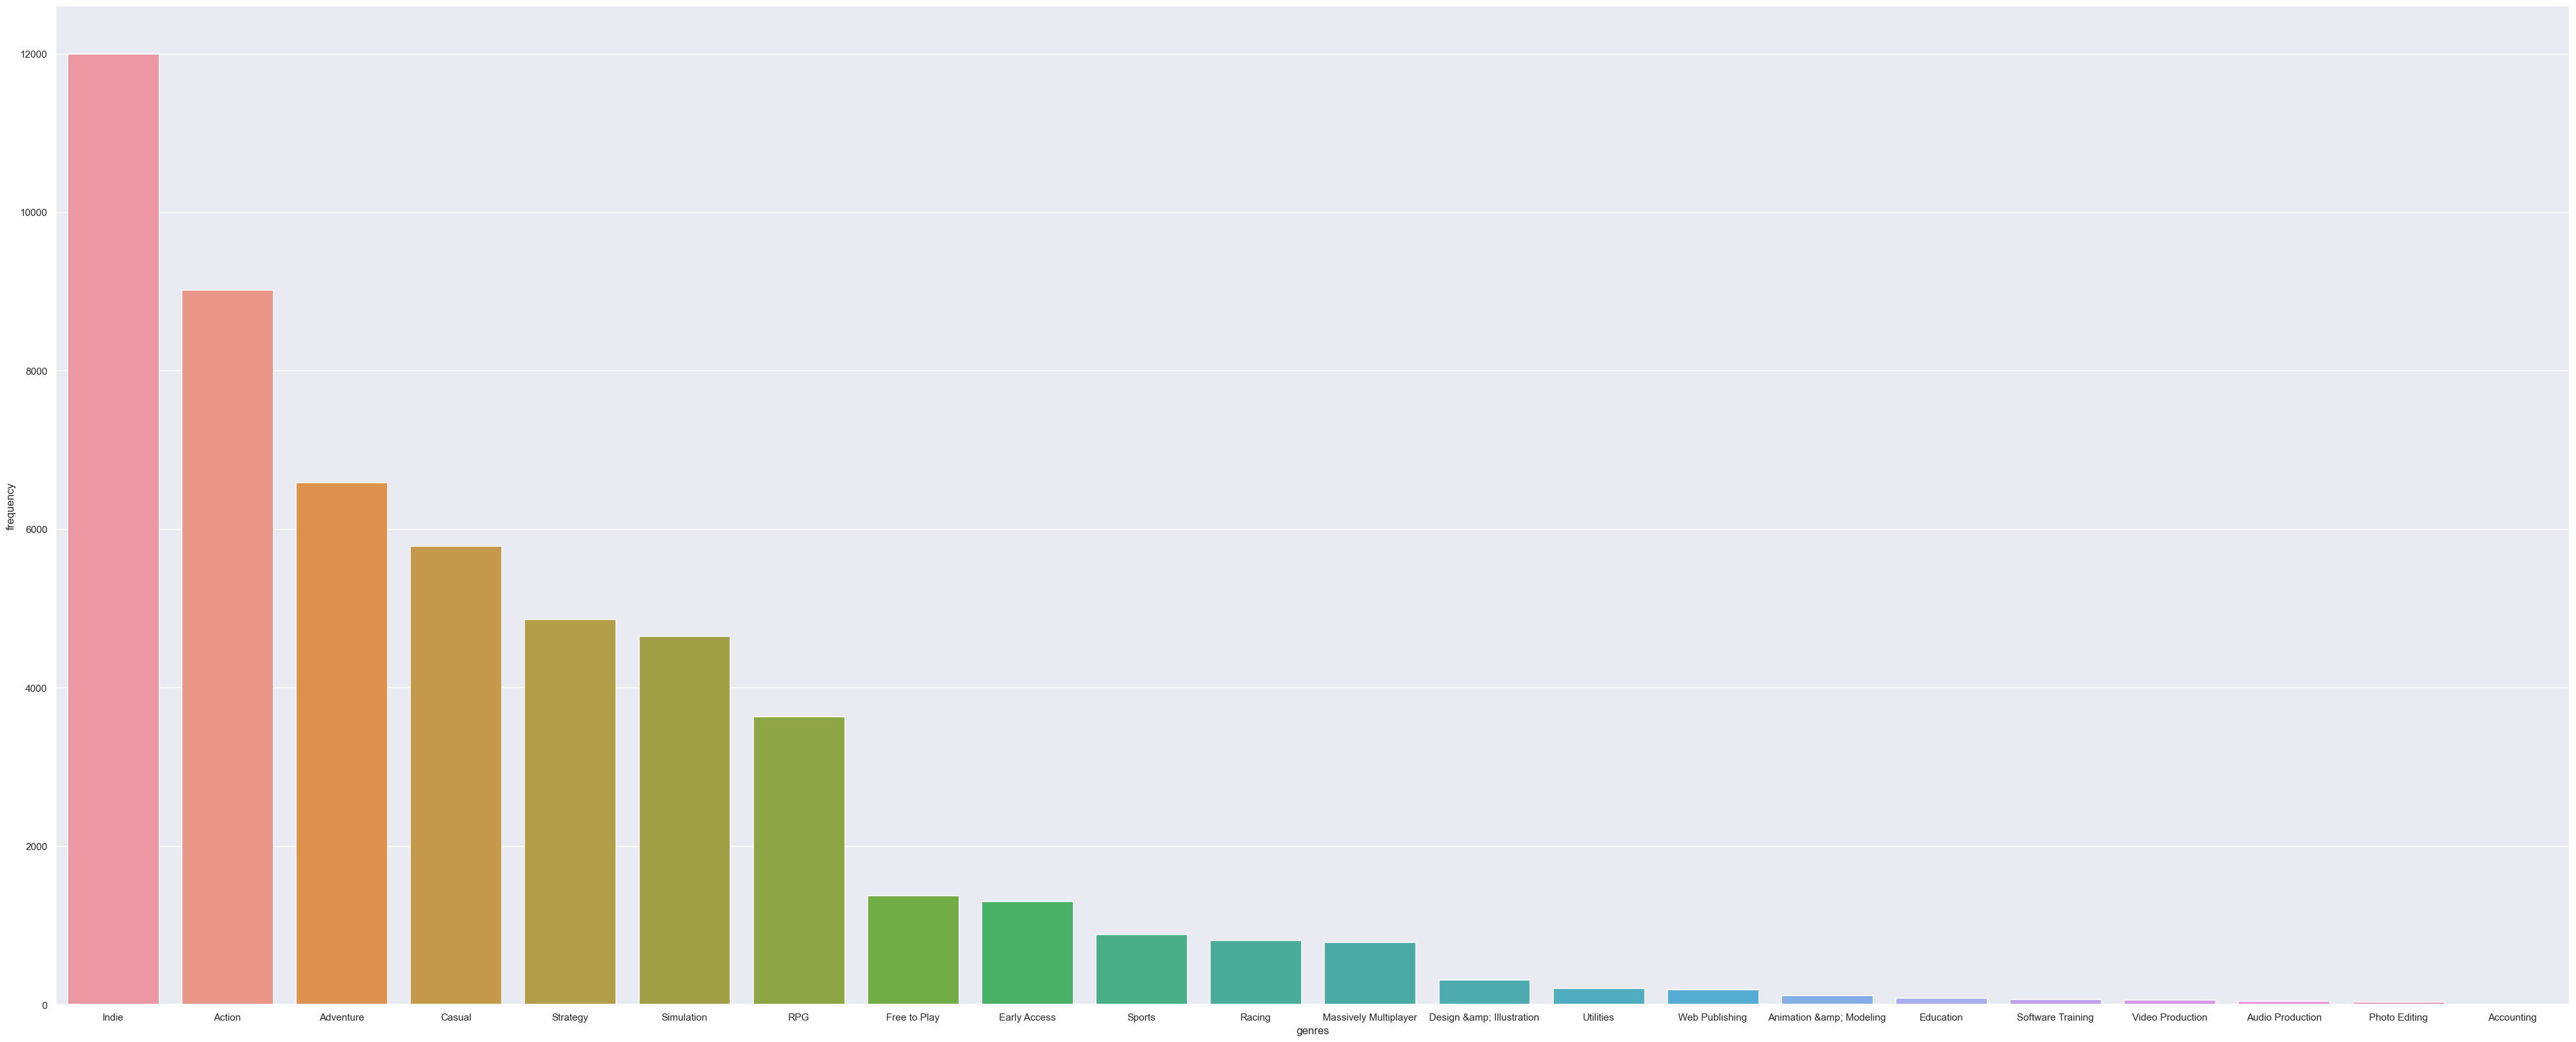

In [48]:
# Create a bar chart with the frequency of each genre
plt.figure(figsize=(50,20))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xlabel('genres')
plt.ylabel('frequency')
plt.show()

In [49]:
# Based in the graphic we are going to select the genres with more frequency
#genres = ['Indie','Action','Adventure','Casual','Simulation','Strategy','RPG','Early Access','Free to Play','Sports','Massively Multiplayer']

In [50]:
#Make a one hot encoding 
df_encoded = pd.get_dummies(df_filtered, columns=['genres'],dtype=int)

In [51]:
#Check how many values we have
df_encoded.dtypes

year                                  int64
price                               float64
early_access                          int32
sentiment                             int64
genres_Accounting                     int32
genres_Action                         int32
genres_Adventure                      int32
genres_Animation &amp; Modeling       int32
genres_Audio Production               int32
genres_Casual                         int32
genres_Design &amp; Illustration      int32
genres_Early Access                   int32
genres_Education                      int32
genres_Free to Play                   int32
genres_Indie                          int32
genres_Massively Multiplayer          int32
genres_Photo Editing                  int32
genres_RPG                            int32
genres_Racing                         int32
genres_Simulation                     int32
genres_Software Training              int32
genres_Sports                         int32
genres_Strategy                 

In [52]:
#Only left the values 1-9
df_encoded = df_encoded[df_encoded['sentiment'] != 0]

In [53]:
#change the name of the genres
df_encoded = df_encoded.rename(columns={'genres_Web Publishing': 'Web Publishing', 'genres_Video Production': 'Video Production','genres_Utilities': 'Utilities', 'genres_Software Training': 'Software Training','genres_Photo Editing': 'Photo Editing', 'genres_Education': 'Education','genres_Design &amp; Illustration': 'Design &amp; Illustration', 'genres_Racing': 'Racing','genres_Massively Multiplayer': 'Massively Multiplayer', 'genres_Sports': 'Sports','genres_Free to Play': 'Free to Play', 'genres_Early Access': 'Early Access','genres_RPG': 'RPG', 'genres_Strategy': 'Strategy','genres_Simulation': 'Simulation','genres_Casual': 'Casual','genres_Adventure': 'Adventure','genres_Action': 'Action','genres_Indie':'Indie','genres_Accounting':'Accounting','genres_Animation &amp; Modeling':'Animation &amp; Modeling','genres_Audio Production':'Audio Production'})

In [54]:
df_encoded.dtypes

year                           int64
price                        float64
early_access                   int32
sentiment                      int64
Accounting                     int32
Action                         int32
Adventure                      int32
Animation &amp; Modeling       int32
Audio Production               int32
Casual                         int32
Design &amp; Illustration      int32
Early Access                   int32
Education                      int32
Free to Play                   int32
Indie                          int32
Massively Multiplayer          int32
Photo Editing                  int32
RPG                            int32
Racing                         int32
Simulation                     int32
Software Training              int32
Sports                         int32
Strategy                       int32
Utilities                      int32
Video Production               int32
Web Publishing                 int32
dtype: object

In [55]:
df_encoded

,year,price,early_access,sentiment,Accounting,Action,Adventure,Animation &amp; Modeling,Audio Production,Casual,...,Photo Editing,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing
293,2000,4.99,0,8,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
294,2000,6.99,0,9,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
295,2000,6.99,0,8,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
295,2000,6.99,0,8,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
296,2000,9.99,0,9,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21772,2018,0.00,0,7,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
21772,2018,0.00,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
21774,2021,4.99,0,6,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21774,2021,4.99,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


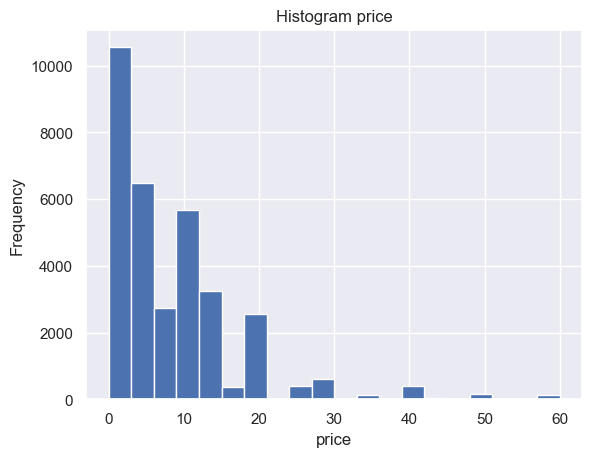

In [56]:
#Make a histogram of the preces we are going to use in the model
plt.hist(df_encoded['price'], bins=20)
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Histogram price')
plt.show()

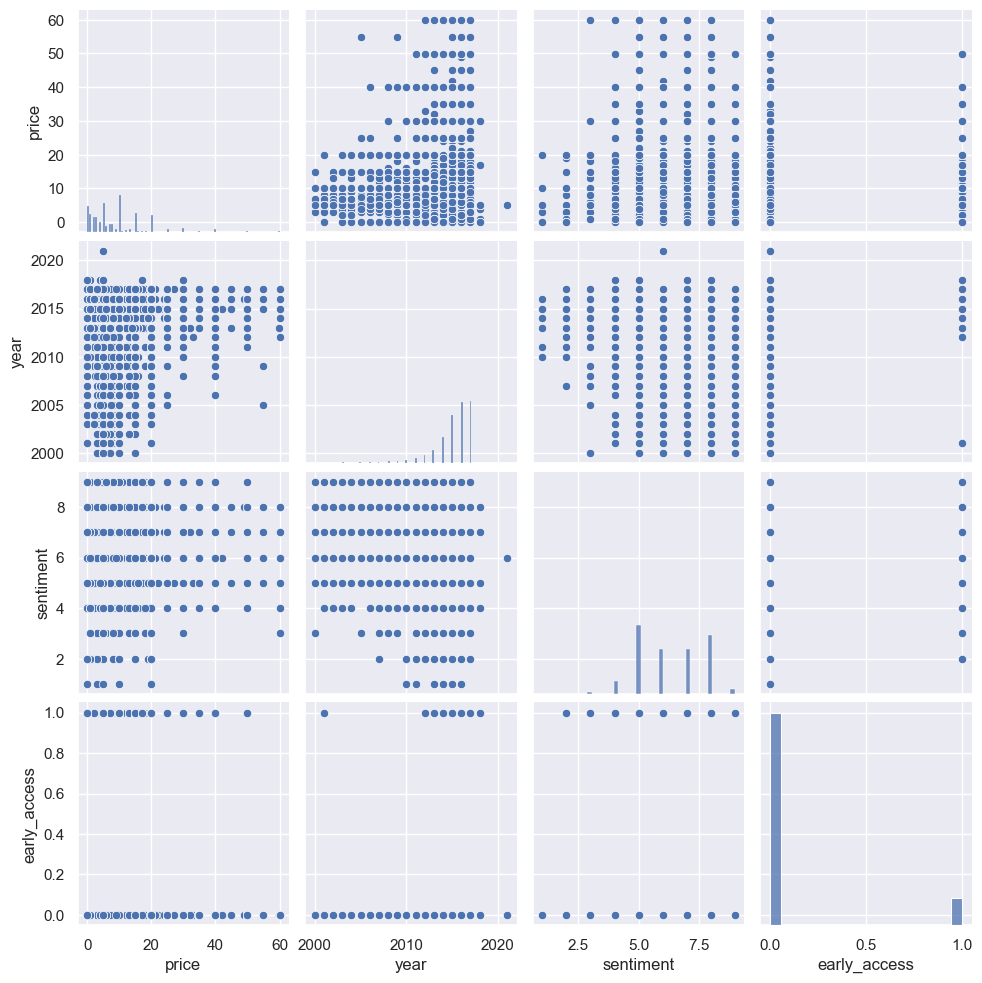

In [57]:
sns.pairplot(df_encoded, vars=['price', 'year','sentiment','early_access'])
plt.show()

Desicion Tree Regressor

In [58]:
#Use the genres we selected had more frequency 
genres = ['Indie','Action','Adventure','Casual','Simulation','Strategy','RPG','Early Access','Free to Play','Sports','Massively Multiplayer']

In [59]:
len(genres)

11

In [60]:
# We select the predictor variables X and the variable to predict y

X = df_encoded[['year', 'early_access', 'sentiment']+genres]
y = df_encoded['price']

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(23450, 14) (23450,) (10050, 14) (10050,)


In [62]:
print('Proporción de etiquetas en set de entrenamiento:', y_train.sum()/y_train.count())
print('Proporción de etiquetas en set de testeo:', y_test.sum()/y_test.count())

Proporción de etiquetas en set de entrenamiento: 8.849191044776118
Proporción de etiquetas en set de testeo: 8.856346268656717


In [63]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=None)
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [64]:
y_train_pred = tree.predict(X_train)

In [65]:
y_test_pred = tree.predict(X_test)

In [66]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.metrics import mean_squared_error

rmse_train = (mean_squared_error(y_train, y_train_pred, squared = False))
rmse_test = (mean_squared_error(y_test, y_test_pred, squared = False))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')



Raíz del error cuadrático medio en Train: 8.401470427014889
Raíz del error cuadrático medio en Test: 8.848144043369814


In [67]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_test_pred)
print('El coeficiente de determinación del regresor es:', r2)

El coeficiente de determinación del regresor es: 0.0616208732923228


RANDOM FOREST

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [69]:
#Use the genres we selected had more frequency 
genres = ['Indie','Action','Adventure','Casual','Simulation','Strategy','RPG','Early Access','Free to Play','Sports','Massively Multiplayer']

In [70]:
# We select the predictor variables X and the variable to predict y

X = df_encoded[['year', 'early_access', 'sentiment']+genres]
y = df_encoded['price']

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(23450, 14) (23450,) (10050, 14) (10050,)


In [72]:
rf = RandomForestRegressor(n_estimators = 50, max_features = 'sqrt', max_depth = 5, random_state = 18).fit(X_train, y_train)

In [73]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [74]:
#Calculate the RMSE
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.metrics import mean_squared_error

rmse_train = (mean_squared_error(y_train, y_train_pred, squared = False))
rmse_test = (mean_squared_error(y_test, y_test_pred, squared = False))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')


Raíz del error cuadrático medio en Train: 8.797849299333054
Raíz del error cuadrático medio en Test: 8.836807400732068


In [75]:
#Calculate the R^2
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_test_pred)
print('El coeficiente de determinación del regresor es:', r2)

El coeficiente de determinación del regresor es: 0.06402392048017558


In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {'n_estimators': [10, 50, 100, 200]}

# Create an instance of GridSearchCV with a Random Forest Regressor as the estimator
CV_rfr = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)

# Fit GridSearchCV
CV_rfr.fit(X_train, y_train)

# Get best hyperparameters
best_params = CV_rfr.best_params_
best_n_estimators = best_params['n_estimators']

print(f'Best n_estimators: {best_n_estimators}')

Best n_estimators: 200


In [77]:
#Try again the model with the best estimator
rf2 = RandomForestRegressor(n_estimators = 200, max_features = 'sqrt', max_depth = 5, random_state = 18).fit(X_train, y_train)

In [78]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [79]:
#Calculate the RMSE
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.metrics import mean_squared_error

rmse_train2 = (mean_squared_error(y_train, y_train_pred, squared = False))
rmse_test2 = (mean_squared_error(y_test, y_test_pred, squared = False))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 8.797849299333054
Raíz del error cuadrático medio en Test: 8.836807400732068


In [80]:
#Calculate the R^2
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_test_pred)
print('El coeficiente de determinación del regresor es:', r2)

El coeficiente de determinación del regresor es: 0.06402392048017558


In [81]:
import pickle

# Save the trained model and RMSE values to a file
with open('model_and_rmse.pkl', 'wb') as file:
    pickle.dump((rf2, rmse_train2, rmse_test2), file)

In [82]:
from pandas import to_numeric

def get_predict(year, early_access, sentiment, genre):
    # Load the saved model from a file
    with open('model_and_rmse.pkl', 'rb') as file:
        data = pickle.load(file)
    
    # Unpack the tuple and extract the model
    model, rmse_train, rmse_test = data
    
    # Create a list of all possible genres
    all_genres = ['Indie','Action','Adventure','Casual','Simulation',
                  'Strategy','RPG','Early Access','Free to Play','Sports','Massively Multiplayer']
    
    # Create a one-hot encoded representation of the input genre
    genre_encoded = [1 if g == genre else 0 for g in all_genres]
    
    # Create input data for prediction
    X = [[year, early_access, sentiment] + genre_encoded]
    
    # Make prediction
    y_pred = model.predict(X)
    
    # Return prediction as a scalar value
    return {'predict price': round(to_numeric(y_pred[0]), 2), 'rmse_train': rmse_train, 'rmse_test': rmse_test}


print(get_predict(2014,1,3,'Indie'))

{'predict price': 10.09, 'rmse_train': 8.797849299333054, 'rmse_test': 8.836807400732068}


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
